In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df_all=pd.read_csv('법정동데이터ver2.csv')
df_all.head()

,field_1,버스정류장수,자전거도로길이,자전거도로수,지하철역수,공원율,사고 다발 횟수,도로길이,도로수,평균경사도,추정교통량,안정성지수평균,직장인구,생활인구,자전거이용량
0,0,8,0.000000,0,0,70.44,0.0,7853.606094,51,27.666667,908.2,0.539394,121155.06,9522.102855,16882
1,1,0,0.000000,0,0,70.44,0.0,2301.024680,32,9.666667,908.2,0.000000,121155.06,9522.102855,0
2,2,0,0.000000,0,0,70.44,0.0,983.529811,16,1.666667,908.2,0.000000,121155.06,9522.102855,0
3,3,2,0.000000,0,0,70.44,0.0,1838.011626,33,1.000000,908.2,0.000000,121155.06,9522.102855,24012
4,4,1,290.058108,5,0,70.44,0.0,2002.683230,34,0.666667,908.2,0.068966,121155.06,9522.102855,32494


In [3]:
df_all=df_all.assign(
    대중교통 = lambda x: x['버스정류장수'] + x['지하철역수'],
    자전거도로수용율 = lambda x: x['자전거도로길이'] /x['도로길이'],
    인구 = lambda x:x['직장인구'] +x['생활인구']
)
df_use=df_all[['대중교통','자전거도로수용율','평균경사도','인구','추정교통량','안정성지수평균','자전거이용량']]
df_use.fillna(0,inplace=True)

C:\Anaconda3\envs\practice\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [4]:
df_use=df_use.query('안정성지수평균 > 0 & 자전거도로수용율 > 0')

In [5]:
df_use

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량
4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494
5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0
6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340
18,16,0.428982,3.333333,9.990734e+05,2506.993103,0.239583,156114
31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756
...,...,...,...,...,...,...,...
462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388
463,32,0.241067,2.333333,1.291689e+06,69951.000000,0.690722,287342
464,61,0.176436,0.333333,3.045575e+06,40420.000000,0.804035,1236036
465,54,0.147195,2.333333,1.560991e+06,31903.000000,0.708297,719840


In [6]:
df_cl=df_use[['자전거도로수용율','안정성지수평균']]
df_cl.isna().sum()

자전거도로수용율    0
안정성지수평균     0
dtype: int64

### K-means Clustering

In [7]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df_use[['자전거도로수용율','안정성지수평균']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

C:\Anaconda3\envs\practice\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

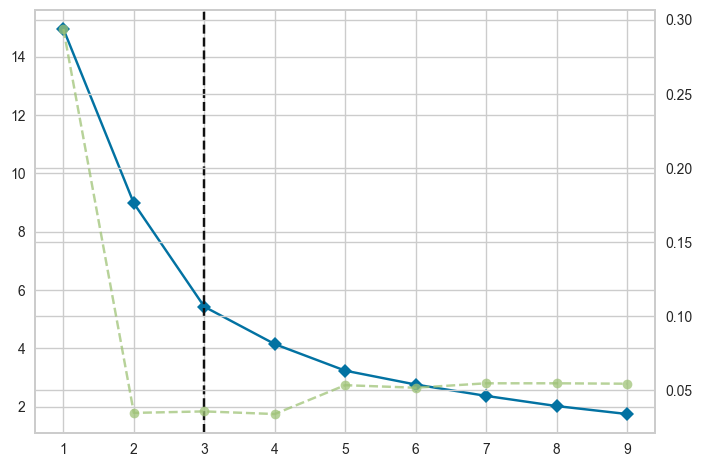

In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [9]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_use['cluster'] = model.fit_predict(data_scale)

In [10]:
df_use

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,1
5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,1
6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,1
18,16,0.428982,3.333333,9.990734e+05,2506.993103,0.239583,156114,2
31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,1
...,...,...,...,...,...,...,...,...
462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,1
463,32,0.241067,2.333333,1.291689e+06,69951.000000,0.690722,287342,1
464,61,0.176436,0.333333,3.045575e+06,40420.000000,0.804035,1236036,1
465,54,0.147195,2.333333,1.560991e+06,31903.000000,0.708297,719840,1


In [11]:
df_use.to_csv('kmean.csv',index=False,encoding='utf-8')

In [12]:
df_use['field_1'] =df_all['field_1']
df_use

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster,field_1
4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,1,4
5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,1,5
6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,1,6
18,16,0.428982,3.333333,9.990734e+05,2506.993103,0.239583,156114,2,18
31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,1,31
...,...,...,...,...,...,...,...,...,...
462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,1,462
463,32,0.241067,2.333333,1.291689e+06,69951.000000,0.690722,287342,1,463
464,61,0.176436,0.333333,3.045575e+06,40420.000000,0.804035,1236036,1,464
465,54,0.147195,2.333333,1.560991e+06,31903.000000,0.708297,719840,1,465


In [13]:
df_use.groupby('cluster').agg(['mean','size'])

대중교통       자전거도로수용율          평균경사도                 인구       \
              mean size      mean size      mean size          mean size   
cluster                                                                    
0        49.523810   63  0.155982   63  4.724868   63  2.685417e+06   63   
1        43.955224  134  0.097667  134  5.597015  134  1.900444e+06  134   
2        29.346154   26  0.567757   26  5.000000   26  2.745245e+06   26   

                추정교통량        안정성지수평균              자전거이용량          field_1       
                 mean size      mean size           mean size        mean size  
cluster                                                                         
0        26499.416138   63  1.429000   63  470367.873016   63  365.761905   63  
1        23347.504066  134  0.570499  134  302749.716418  134  288.470149  134  
2        22753.086273   26  0.866369   26  326089.923077   26  327.000000   26

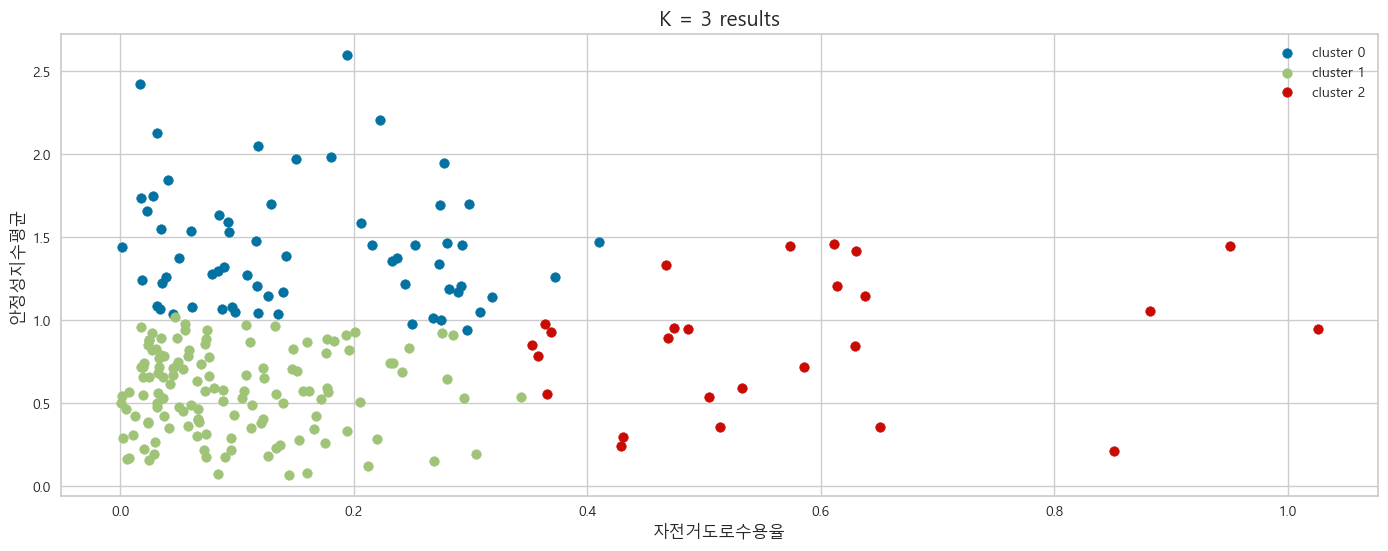

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize = (17, 6))
k= 3
for i in range(k):
    plt.scatter(df_use.loc[df_use['cluster'] == i, '자전거도로수용율'], df_use.loc[df_use['cluster'] == i, '안정성지수평균'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('자전거도로수용율', size = 12)
plt.ylabel('안정성지수평균', size = 12)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df_use

# 정규화 진행
scaler = MinMaxScaler()

data_scale = scaler.fit_transform(df_use.iloc[:,:7])
df_sc=pd.DataFrame(data_scale,columns=df_use.columns[:7])
df_sc['cluster'] = df_use['cluster']
df_sc

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
0,0.003597,0.140800,0.021277,0.004727,0.005572,0.000000,0.006655,NaN
1,0.007194,0.133211,0.031915,0.016049,0.006853,0.071526,0.000000,NaN
2,0.003597,0.086967,0.031915,0.016049,0.006853,0.041894,0.011948,NaN
3,0.057554,0.417831,0.106383,0.036140,0.015381,0.067410,0.031972,NaN
4,0.017986,0.071682,0.021277,0.015364,0.002956,0.097519,0.007528,1.0
...,...,...,...,...,...,...,...,...
218,0.147482,0.172770,0.159574,0.033575,0.279720,0.207022,0.060495,1.0
219,0.115108,0.234622,0.074468,0.046726,0.429160,0.245653,0.058847,1.0
220,0.219424,0.171610,0.010638,0.110171,0.247983,0.290422,0.253138,1.0
221,0.194245,0.143101,0.074468,0.056467,0.195730,0.252597,0.147422,NaN


In [16]:
df_use.groupby('cluster').mean()

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,field_1
cluster,,,,,,,,
0,49.523810,0.155982,4.724868,2.685417e+06,26499.416138,1.429000,470367.873016,365.761905
1,43.955224,0.097667,5.597015,1.900444e+06,23347.504066,0.570499,302749.716418,288.470149
2,29.346154,0.567757,5.000000,2.745245e+06,22753.086273,0.866369,326089.923077,327.000000


In [17]:
df_sc.query('cluster == 0')

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
176,1.000000,0.035239,0.148936,0.155486,1.000000,0.232234,0.262537,0.0
178,0.571942,0.063850,0.489362,0.584323,0.537412,0.222622,0.107979,0.0
199,0.107914,0.595956,0.202128,0.164675,0.234789,0.550505,0.029667,0.0
201,0.194245,0.558746,0.223404,0.229530,0.499138,0.544011,0.266456,0.0
202,0.100719,1.000000,0.031915,0.244225,0.207154,0.347381,0.219493,0.0
203,0.115108,0.246095,0.191489,0.107502,0.329231,0.547995,0.118572,0.0
210,0.194245,0.399301,0.021277,0.242764,0.335513,0.555094,0.266696,0.0
211,0.140288,0.226979,0.042553,0.109362,0.060039,0.508914,0.068601,0.0
213,0.097122,0.030055,0.106383,0.017952,0.174128,0.402237,0.021861,0.0


In [18]:
location=pd.read_csv('서울시_행정동별_자전거도로.csv',encoding='cp949')[['field_1','EMD_KOR_NM']]
location

,field_1,EMD_KOR_NM
0,0,청운동
1,1,신교동
2,2,궁정동
3,3,효자동
4,4,창성동
...,...,...
462,462,둔촌동
463,463,암사동
464,464,성내동
465,465,천호동


In [19]:
location.merge(df_use).query('cluster==0')['EMD_KOR_NM'].unique().tolist()

['청암동',
 '원효로4가',
 '홍익동',
 '마장동',
 '사근동',
 '행당동',
 '성수동1가',
 '성수동2가',
 '용답동',
 '미아동',
 '번동',
 '수유동',
 '증산동',
 '토정동',
 '합정동',
 '목동',
 '염창동',
 '등촌동',
 '화곡동',
 '마곡동',
 '신도림동',
 '구로동',
 '고척동',
 '개봉동',
 '오류동',
 '궁동',
 '온수동',
 '천왕동',
 '가산동',
 '시흥동',
 '당산동5가',
 '당산동',
 '도림동',
 '문래동1가',
 '문래동2가',
 '문래동3가',
 '문래동6가',
 '양평동1가',
 '양평동4가',
 '양평동5가',
 '양평동6가',
 '신길동',
 '대림동',
 '사당동',
 '대방동',
 '신대방동',
 '우면동',
 '대치동',
 '신사동',
 '자곡동',
 '도곡동',
 '풍납동',
 '송파동',
 '석촌동',
 '삼전동',
 '가락동',
 '문정동',
 '장지동',
 '방이동',
 '오금동',
 '거여동',
 '마천동',
 '고덕동']

In [20]:
location.merge(df_use)

,field_1,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
0,4,창성동,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,1
1,5,통의동,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,1
2,6,적선동,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,1
3,18,세종로,16,0.428982,3.333333,9.990734e+05,2506.993103,0.239583,156114,2
4,31,운니동,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,1
...,...,...,...,...,...,...,...,...,...,...
218,462,둔촌동,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,1
219,463,암사동,32,0.241067,2.333333,1.291689e+06,69951.000000,0.690722,287342,1
220,464,성내동,61,0.176436,0.333333,3.045575e+06,40420.000000,0.804035,1236036,1
221,465,천호동,54,0.147195,2.333333,1.560991e+06,31903.000000,0.708297,719840,1
